In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino

## Session 12
## Implementation of Perceptron
<div>
<img src='../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>
    </div>

## 1. Import Statements
Import all the libraries.

In [2]:
###-----------------
### Import libraries
###-----------------

import os                        # Operating system-related functions and utilities
import numpy as np               # NumPy for numerical computations
import pandas as pd              # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for data visualization


from sklearn.datasets import make_moons               # import dataset
from sklearn.model_selection import train_test_split  # for train-test splitting
from sklearn.metrics import accuracy_score            # for accuracy score calculation

## 2. Setup Global Parameters

In [3]:
###------------------
### Global Parameters
###------------------

# Directories
inpDir = '../../../input'
outDir = '../output'


RANDOM_STATE = 42 
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

rng = np.random.default_rng(seed=RANDOM_STATE) # initialize random number generator

N_SAMPLE = 1000
NOISE = 0.2
TEST_SIZE  = 0.2 # Size of test data
EPOCHS = 200
ALPHA = 0.1
# Parameters for plotting
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Helper Function

In [4]:
def fn_plot_decision_boundary(X_train: np.ndarray, X_test: np.ndarray):
    
    # initialize the figure
    fig, ax = plt.subplots(figsize = (8,5));
    
    # Small increment to create object function surface
    dm = 0.01
    
    # Range of X values (First feature)
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    
    # Range of Y values (Second feature)
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    
    # Create a grid to evaluate the object function
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # flatten and stack
    # arrays will be stacked along their last axis after being upgraded to at least 2-D 
    # with 1’s post-pended to the shape (column vectors made out of 1-D arrays)
    XX = np.c_[xx.ravel(), yy.ravel()] 

    # add another column filled with 1 to make it work with the predict function
    XX = np.hstack( ( XX, np.ones((XX.shape[0],1)) ) )
    
    # list to collect predictions
    y_pred = []
    
    # Iterate over rows
    for row in (XX):

        y_p = predict(row, weights)
        y_pred.append(y_p)
        
    Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    ax.scatter(X_train[:, 0], X_train[:, 1], 
               c = X_train[:, 2],
               s = 20, edgecolor = 'k', cmap = plt.cm.bwr)
    
    ax.scatter(X_test[:, 0], X_test[:, 1], 
               c = X_test[:, 2],
               s = 50, 
               marker = '*', 
               edgecolor = 'k', cmap = plt.cm.jet)

    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    ax.set_ylabel('B')
    plt.show()

## Load Data Set

<div class="alert alert-block alert-info" style="font-family: Arial; font-size:1.1em;">
This data is generated using SKLearn make moons.
</div>

In [5]:
# read CSV from the disk
X, y = make_moons(N_SAMPLE, 
                  noise=NOISE, 
                  shuffle=True, 
                  random_state=RANDOM_STATE)

In [6]:
data_df = pd.DataFrame(X, columns=['x1', 'x2'])
data_df['target'] = y
data_df.head()

,x1,x2,target
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [8]:
data_df.describe()

,x1,x2,target
count,1000.000000,1000.000000,1000.00000
mean,0.497013,0.244640,0.50000
std,0.889233,0.529810,0.50025
min,-1.444097,-1.001657,0.00000
25%,-0.100684,-0.199191,0.00000
50%,0.510371,0.250708,0.50000
75%,1.092727,0.691500,1.00000
max,2.567427,1.476610,1.00000


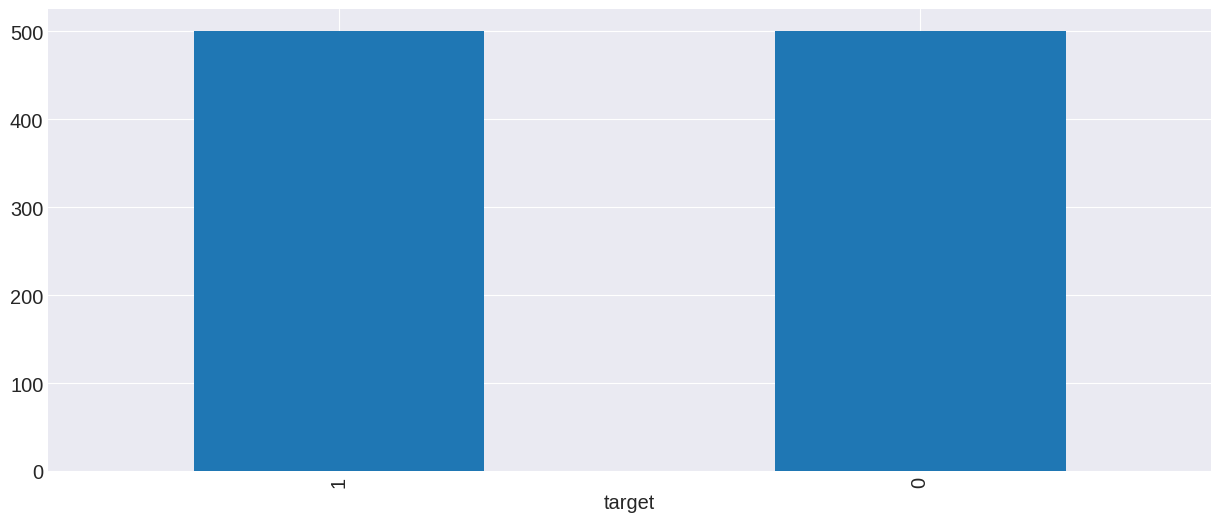

In [9]:
data_df.target.value_counts().plot(kind = 'bar');

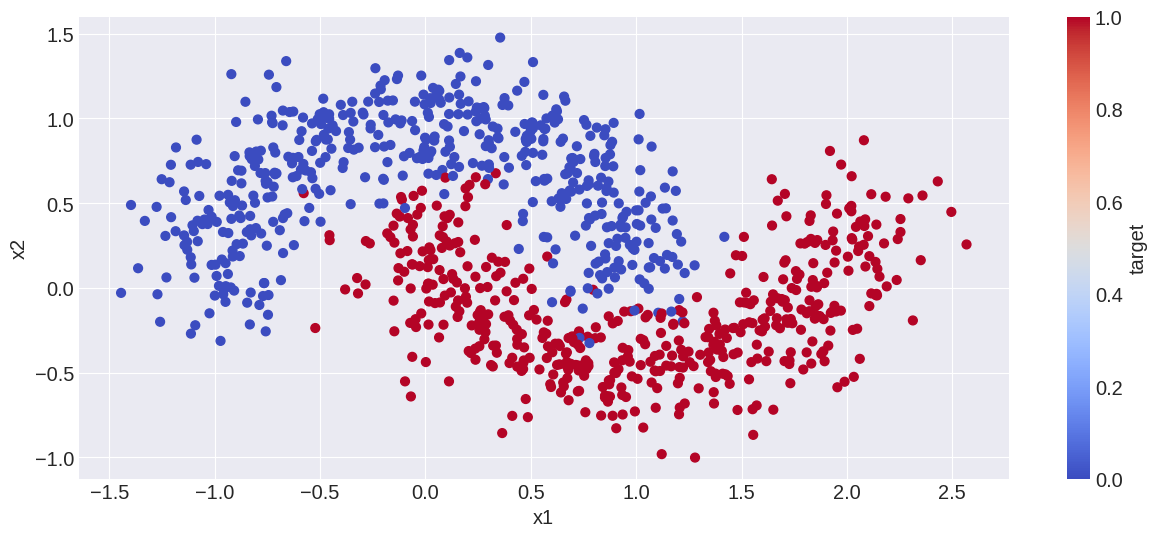

In [10]:
data_df.plot.scatter('x1', 'x2', s =40, c = 'target', cmap = CMAP);

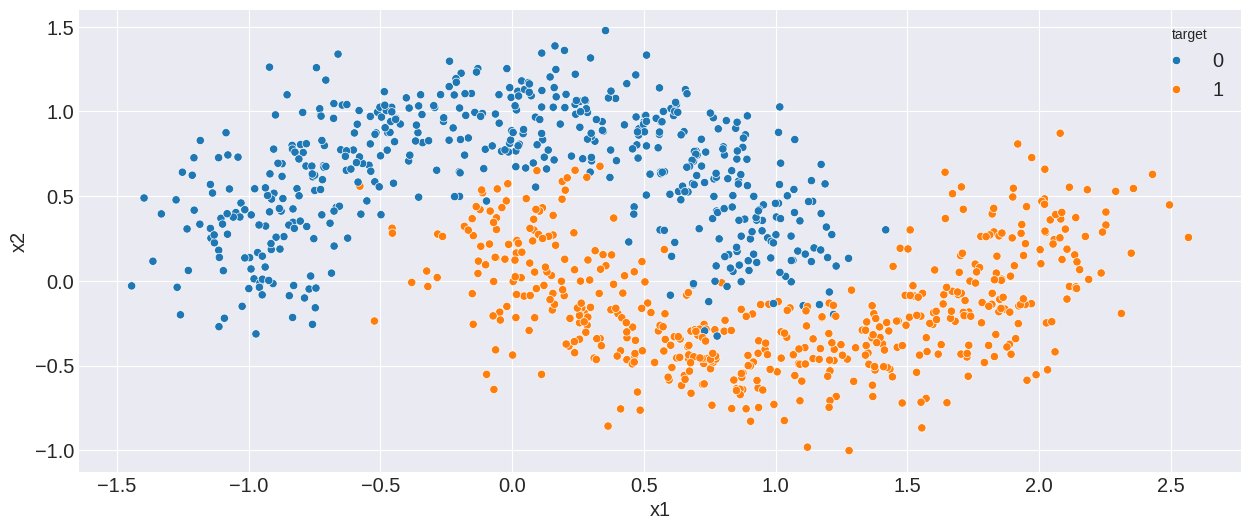

In [11]:
import seaborn as sns
sns.scatterplot(x = 'x1', y = 'x2', data=data_df, hue = 'target');

In [12]:
data_train, data_test = data_df.to_numpy()[:800], data_df.to_numpy()[800:]
data_train.shape, data_test.shape

((800, 3), (200, 3))

In [13]:
def predict(rw, wghts):

    #x1*w1+x2*w2+b

    z = wghts[0]

    for i in range(len(rw)-1):
        
        z  += wghts[i+1] * rw[i]
    
    return 1 if z>=0 else 0

In [14]:
###----------
### Unit test
###----------
weights = np.array([0.1, 2.0, 1.0])
display(data_df.loc[0])
predict(data_df.loc[0].to_numpy(), weights)

x1       -0.111667
x2        0.520224
target    1.000000
Name: 0, dtype: float64

1

In [15]:
def train_weights(train, alpha, n_epochs):

    errors = []

    weights = rng.random(train.shape[1])

    m = train.shape[0]

    for epoch in np.arange(n_epochs):

        sum_error = 0
        
        for row in train:

            prediction = predict(row, weights)

            dz = prediction - row[-1]

            error = (prediction - row[-1])**2

            sum_error += error

            weights[0] += - alpha * dz / m

            for i in range (len(row) -1):
                
                weights[i+1] += - alpha * dz * row[i] / m

        errors.append(sum_error)
        
    return errors, weights
    

In [16]:
errors, weights = train_weights(data_train, ALPHA, EPOCHS)

In [17]:
weights

array([ 8.10485559e-05,  2.72524605e-04, -3.86023751e-04])

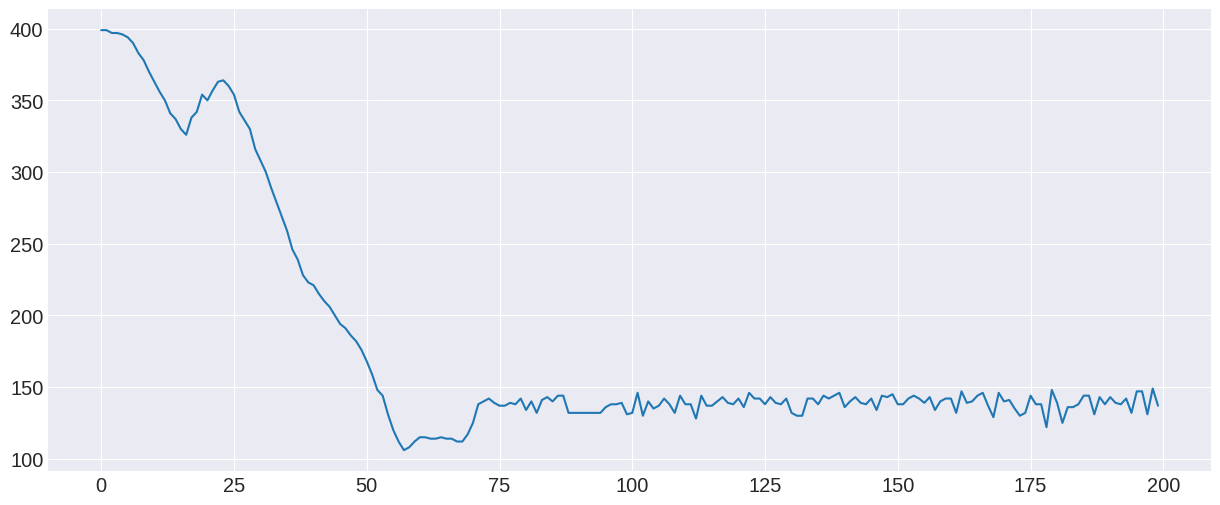

In [18]:
plt.plot(errors)

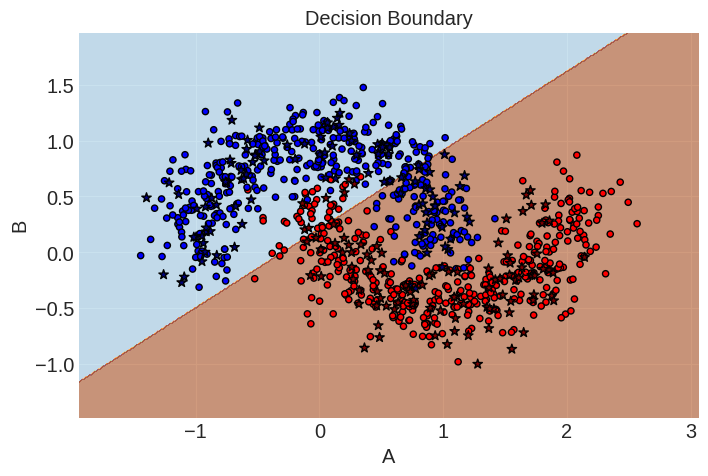

In [19]:
fn_plot_decision_boundary(data_train, data_test)